<a href="https://colab.research.google.com/github/claudiaesnarrizaga/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Pr%C3%A1ctica_1_Dise%C3%B1o%2C_Entrenamiento_y_Test_de_un_Sistema_de_Redes_de_Neuronas_Artificiales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 - Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas.
###Grupo B03
Integrantes: Celia Díaz, Jaime Martínez, Claudia Esnarrizaga


###**ENUNCIADO**
Crea un modelo de Red de Neuronas Artificiales que sea capaz de **reconocer** y **clasificar imágenes de ropa** en sus diferentes **tipologías**. Este modelo será **definido**, **configurado**, **entrenado**, **evaluado** y **mejorado** para posteriormente usarlo para hacer **predicciones**.
Para ello, tendréis que crear un modelo en **Keras** aplicando de una tirada todos los pasos al conjunto de datos **Fashion-MNIST**, precargado en Keras y muy parecido al que vimos en clase de reconocimiento de cifras.
Fashion_MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70k imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).
Se usan 60k imágenes para entrenar la red y 10k imágenes para evaluar la **precisión** con la que la red aprende a clasificar las imágenes.

####**Cuestiones a tener en cuenta**

1. Importar todas las librerías
requeridas
2. Asegurar que estamos ejecutando la versión 2.0.0 (o superior) de TensorFlow
3. Cargar datos de entrenamiento y de Test a partir de *keras.datasets.fashion_mnist*
4. Analizar si los datos tienen la forma esperada
5. Analizar el uso de la función de keras *keras.layers.Flatten()*




In [23]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x # Metasentencia: asegurarme de que estoy usando la versión por encima de la versión 2
import tensorflow as tf # tensorflow (librería): matrices, tensores
from tensorflow import keras # Usamos keras metido dentro de tensorflow

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [24]:
# 2._ VERSIÓN TENSORFLOW >= 2.0.0
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__) # Vemos qué versión estamos utilizando

GPU Available: []
2.13.0


In [25]:
# 3._ CARGAMOS EL CONJUNTO DE DATOS FASHION-MINIST EN KERAS
from keras.datasets import fashion_mnist # De todos los conjuntos de datos impórtame mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Llama a una función, cargar datos

Para comprobar la forma de los datos, imprimiremos una de las imágenes, elegida de forma aleatoria, y dependiendo del número que nos devuelva, sabremos qué prenda es gracias a la siguiente tabla:

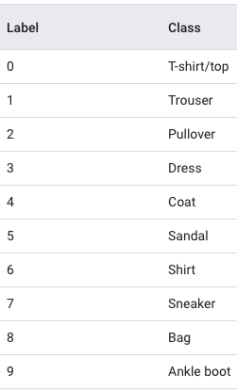

In [26]:
# 4._ COMPROBAR FORMA DE LOS DATOS
print(train_images.shape) # train_images: variable donde se me han guardado las imágenes (60000 imágenes/matrices de 28x28)
# Vemos la matriz de la imagen número 2500 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[2500]))

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0  13   4   0   0   0  30   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 189 228 255 172 124 255 235 201  94   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  52 246 244 227 217 233 235 229 233 239 255  99   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 180 246 226 232 229 223 228 235 234 230 244 216   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 217 242 229 233 235 235 236 236 233 231 241 240   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 244 242 239 233 233 233 232 234 234 239 239 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 227 230 215 250 233 233 233 236 246 220 227 239   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14 249 178 120 255 227 240 241 227 255 108 148 255  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  62 255 136  65 255 231 219 215 23

In [27]:
train_labels[2500] # Cogemos la etiqueta asociada a la imagen 2500
# La imagen corresponde con un vestido.

3

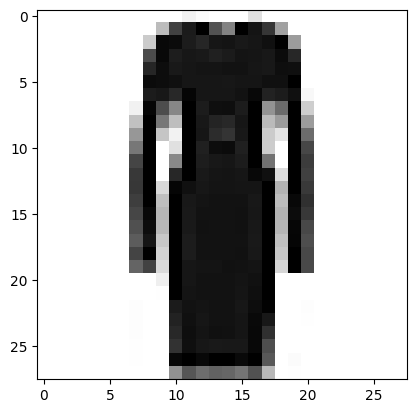

In [28]:
# Veamos el elemento 2500 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[2500]
plt.imshow(digit, cmap=plt.cm.binary) # imshow: muéstrame imagen, le paso una matriz y
                                      # el mapeo de colores es cm.binary (número más bajo = blanco, número más alto = negro)
plt.show()

La función *keras.layers.Flatten()* se utiliza para aplanar una capa de datos en una sola dimensión. En el contexto de un modelo de red neuronal, se utiliza para transformar datos bidimensionales (como imágenes) en una forma unidimensional antes de pasarlos a capas densamente conectadas. En nuestro código, podríamos aplicarlo de la siguiente manera:

In [29]:
# 5._ ANALIZAR FUNCIÓN keras.layers.Flatten()
from tensorflow.keras.layers import Flatten
# Añadimos una capa Flatten después de cargar los datos
model = keras.Sequential([Flatten(input_shape = (28, 28))])

Si agregamos una capa Flatten después de cargar los datos nos transformará las imágenes de 28x28 píxeles en un vector unidimensional de 784 elementos antes de pasarlos a las capas densas de la red neuronal. Esto es necesario porque las capas densas requieren entradas unidimensionales. No nos va a cambiar la forma en que cargamos o mostramos las imágenes, pero va a ser una parte esencial de la definición de nuestro modelo de red neuronal si planeamos usar capas densamente conectadas después de aplanar los datos.

####**Cuestiones para implementar y responder**